In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Dataset path
dataset_path = r"C:\Users\vaidi\Downloads\age_detection\data\UTKFace"

In [2]:
# Function to load images and extract age
def load_utkface_data(dataset_path, img_size=(64, 64)):
    images = []
    ages = []

    # Recursively walk through all subfolders
    for root, dirs, files in os.walk(dataset_path):
        for filename in files:
            # Accept .jpg, .png, .chip, .chip.jpg
            if filename.endswith((".jpg", ".png", ".chip", ".chip.jpg")):
                try:
                    # Extract age from filename (first number before underscore)
                    age = int(filename.split("_")[0])
                    img_path = os.path.join(root, filename)
                    img = cv2.imread(img_path)
                    if img is None:
                        continue  # Skip if image can't be read
                    img = cv2.resize(img, img_size)
                    images.append(img)
                    ages.append(age)
                except Exception as e:
                    continue  # Ignore bad files

    return np.array(images), np.array(ages)

# Set your dataset path here
dataset_path = r"C:\Users\vaidi\Downloads\age_detection\data\UTKFace"

# Load images and labels
print("Loading images...")
images, ages = load_utkface_data(dataset_path)
print(f"Total images loaded: {len(images)}")

Loading images...
Total images loaded: 66976


In [3]:
# Normalize image pixels
images = images / 255.0

# Optionally clip age range (e.g., max age = 100)
ages = np.clip(ages, 0, 100)

# Convert ages to categorical labels (101 classes: 0 to 100)
age_classes = to_categorical(ages, num_classes=101)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, age_classes, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")


Training samples: 53580
Testing samples: 13396


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the model
model = Sequential()

# Convolutional Block 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Block 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Block 3
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(101, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 101)                 │          25,957 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,300,005 (4.96 MB)

 Trainable params: 1,299,557 (4.96 MB)

 Non-trainable params: 448 (1.75 KB)

In [8]:
checkpoint_path = "age_model_checkpoint.weights.h5"
from tensorflow.keras.callbacks import ModelCheckpoint

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)

In [9]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64,
    callbacks=[cp_callback],
    verbose=1
)

Epoch 1/15
838/838 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 0.1095 - loss: 4.1159
Epoch 1: saving model to age_model_checkpoint.weights.h5
838/838 ━━━━━━━━━━━━━━━━━━━━ 356s 417ms/step - accuracy: 0.1095 - loss: 4.1155 - val_accuracy: 0.1548 - val_loss: 3.4540
Epoch 2/15
838/838 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step - accuracy: 0.1451 - loss: 3.4862
Epoch 2: saving model to age_model_checkpoint.weights.h5
838/838 ━━━━━━━━━━━━━━━━━━━━ 369s 401ms/step - accuracy: 0.1451 - loss: 3.4862 - val_accuracy: 0.1696 - val_loss: 3.2284
Epoch 3/15
838/838 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.1536 - loss: 3.3326
Epoch 3: saving model to age_model_checkpoint.weights.h5
838/838 ━━━━━━━━━━━━━━━━━━━━ 388s 409ms/step - accuracy: 0.1536 - loss: 3.3326 - val_accuracy: 0.1627 - val_loss: 3.2574
Epoch 4/15
838/838 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.1582 - loss: 3.2331
Epoch 4: saving model to age_model_checkpoint.weights.h5
838/838 ━━━━━━━━━━━━━━━━━━━━ 380s 406ms/step - accuracy: 

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

419/419 ━━━━━━━━━━━━━━━━━━━━ 22s 53ms/step - accuracy: 0.2680 - loss: 2.5019
Test Accuracy: 26.70%


In [11]:
# Save the full model
model.save("age_detection_model.h5")
print("Model saved successfully.")

Model saved successfully.


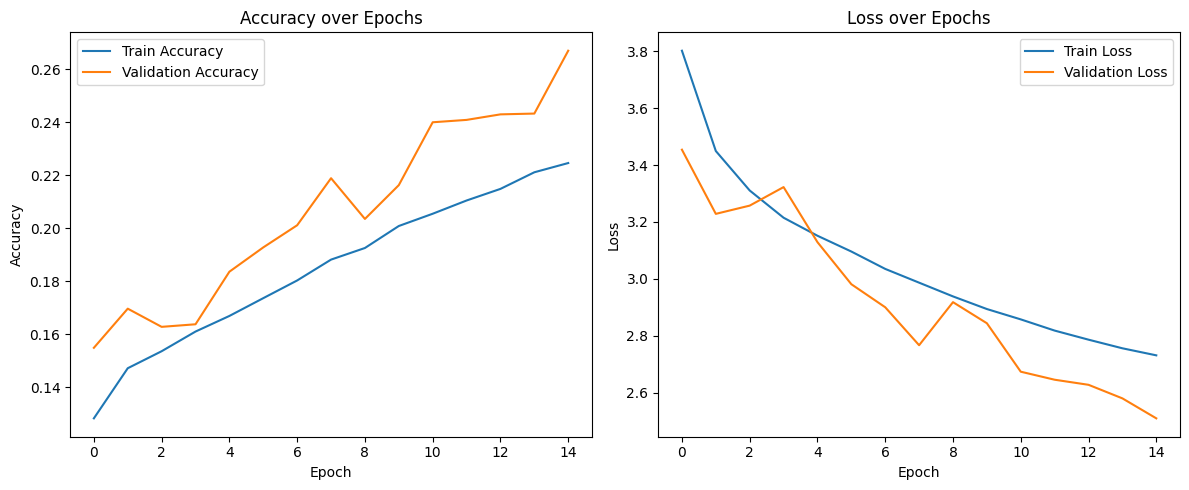

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


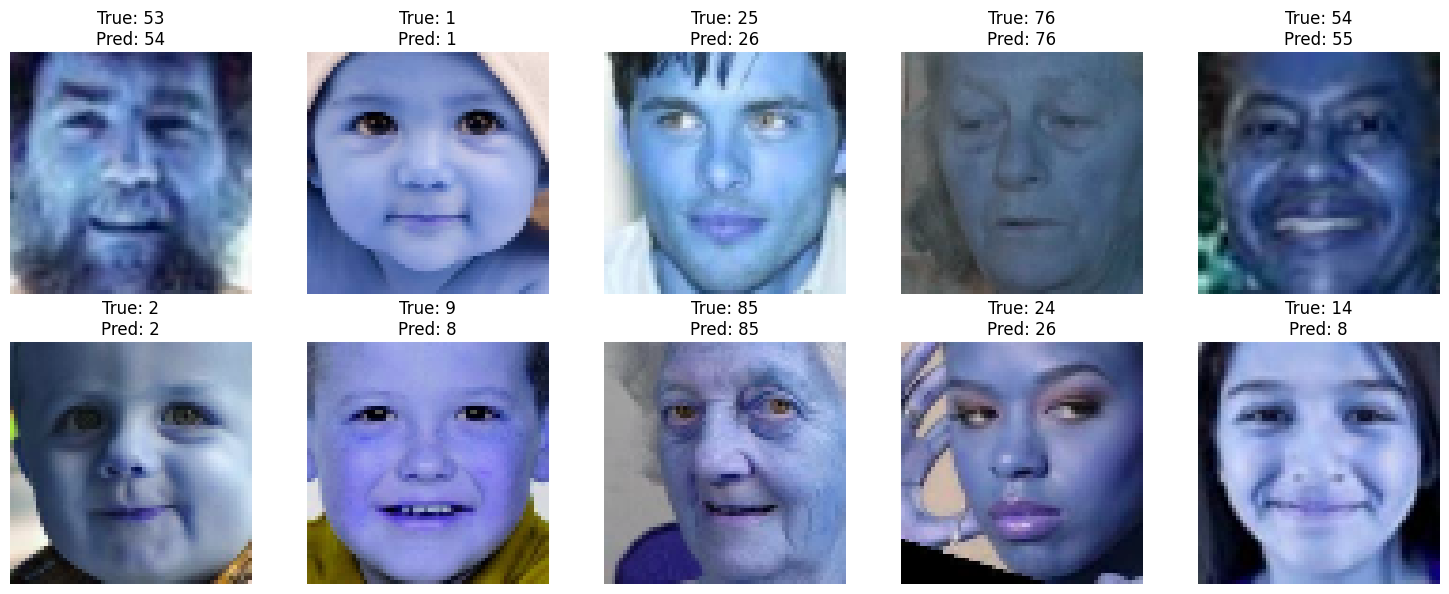

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Predict on a few test samples
num_samples = 10
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)
X_sample = X_test[sample_indices]
y_sample_true = y_test[sample_indices]
y_sample_pred = model.predict(X_sample)

# Convert predictions from one-hot to age labels
y_pred_labels = np.argmax(y_sample_pred, axis=1)
y_true_labels = np.argmax(y_sample_true, axis=1)

# Plot predictions
plt.figure(figsize=(15, 6))
for i in range(num_samples):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_sample[i])
    plt.title(f"True: {y_true_labels[i]}\nPred: {y_pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Your dataset path
data_dir = r"C:\Users\vaidi\Downloads\age_detection\data\UTKFace"

# Supported image formats
valid_extensions = ('.jpg', '.jpeg', '.png')

# Get all image file paths recursively
image_paths = []
for root, _, files in os.walk(data_dir):
    for file in files:
        if file.lower().endswith(valid_extensions):
            image_paths.append(os.path.join(root, file))

X = []
y = []
for path in image_paths:
    try:
        age = int(os.path.basename(path).split('_')[0])
        if age > 100:  # Skip unrealistic ages
            continue
        img = cv2.imread(path)
        img = cv2.resize(img, (64, 64))  # Resize to 64x64
        X.append(img)
        y.append(age)
    except:
        continue

X = np.array(X) / 255.0
y = np.array(y)
print("Filtered data loaded:", X.shape, y.shape)

Filtered data loaded: (66928, 64, 64, 3) (66928,)


In [25]:
import numpy as np
from tensorflow.keras.utils import to_categorical

# Filter y and X to remove age >= 100
valid_indices = y < 100
X = X[valid_indices]
y = y[valid_indices]

# Define bins and labels
bins = [0, 12, 18, 30, 45, 60, 100]
labels = [0, 1, 2, 3, 4, 5]

# Digitize age into bins
y_binned = np.digitize(y, bins) - 1

# Now safely convert to categorical
y_categorical = to_categorical(y_binned, num_classes=len(labels))

print("Filtered and binned data shape:", y_categorical.shape)


Filtered and binned data shape: (66902, 6)


In [26]:
from sklearn.model_selection import train_test_split

# Split the data (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

print("Training shape:", X_train.shape, y_train.shape)
print("Testing shape:", X_test.shape, y_test.shape)


Training shape: (53521, 64, 64, 3) (53521, 6)
Testing shape: (13381, 64, 64, 3) (13381, 6)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 age groups
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Summary (optional)
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,275,590 (4.87 MB)

 Trainable params: 1,275,142 (4.86 MB)

 Non-trainable params: 448 (1.75 KB)

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Save weights to this file
checkpoint_path = "age_group_model_checkpoint.weights.h5"

# Create the callback
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    save_best_only=False,
    verbose=1
)


In [29]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64,
    callbacks=[cp_callback],
    verbose=1
)


Epoch 1/15
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.4936 - loss: 1.4397
Epoch 1: saving model to age_group_model_checkpoint.weights.h5
837/837 ━━━━━━━━━━━━━━━━━━━━ 366s 429ms/step - accuracy: 0.4937 - loss: 1.4394 - val_accuracy: 0.5252 - val_loss: 1.1100
Epoch 2/15
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step - accuracy: 0.6160 - loss: 0.9008
Epoch 2: saving model to age_group_model_checkpoint.weights.h5
837/837 ━━━━━━━━━━━━━━━━━━━━ 375s 421ms/step - accuracy: 0.6161 - loss: 0.9007 - val_accuracy: 0.6477 - val_loss: 0.8135
Epoch 3/15
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step - accuracy: 0.6668 - loss: 0.7732
Epoch 3: saving model to age_group_model_checkpoint.weights.h5
837/837 ━━━━━━━━━━━━━━━━━━━━ 379s 417ms/step - accuracy: 0.6668 - loss: 0.7732 - val_accuracy: 0.6302 - val_loss: 0.8707
Epoch 4/15
837/837 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.7013 - loss: 0.6972
Epoch 4: saving model to age_group_model_checkpoint.weights.h5
837/837 ━━━━━━━━━━━━━━━━━━━━ 385s

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

419/419 ━━━━━━━━━━━━━━━━━━━━ 24s 56ms/step - accuracy: 0.8701 - loss: 0.4050
Test Accuracy: 87.16%


In [31]:
model.save("age_group_classifier_model.h5")
print("Model saved successfully.")

Model saved successfully.


In [56]:
def predict_age_group(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (64, 64)) / 255.0
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)
    
    age_groups = ['Child', 'Teen', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
    return age_groups[predicted_class]

# Example
print(predict_age_group("C:/Users/vaidi/OneDrive/Pictures/Screenshots/Hii.png"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Child
